In [300]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [301]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

##### Strategy

In [302]:
strategies = ["best1bin", "best1exp", "rand1exp", "randtobest1exp", "currenttobest1exp",
             "best2exp","rand2exp","randtobest1bin","currenttobest1bin","best2bin","rand2bin","rand1bin"]

def dif_evo_iterations(strategy):
    res = differential_evolution(ackley, bounds, strategy=strategy, seed=42)
    return res.nit

iterations_by_strategy = []

for strategy in strategies:
    iterations_by_strategy.append(dif_evo_iterations(strategy))

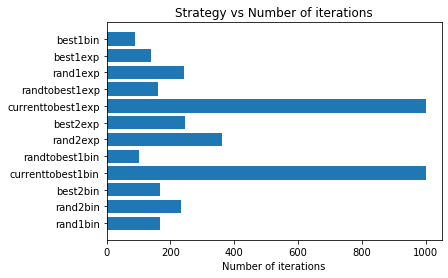

In [303]:
fig, ax = plt.subplots()

ax.barh(strategies, iterations_by_strategy, align='center')
ax.set_yticks(strategies)
ax.invert_yaxis()

ax.set_xlabel('Number of iterations')
ax.set_title('Strategy vs Number of iterations')

plt.show()

лучший результат при дефолтном значении best1bin

##### Popsize

In [304]:
pop_sizes = [1, 2, 3, 4, 5, 6, 7, 10, 15, 20, 30, 50, 70, 100, 150, 200]

def dif_evo_iterations(pop_size):
    res = differential_evolution(ackley, bounds, popsize=pop_size, seed=42)
    print(res.fun)
    return res.nit

iterations_by_popsize = []

for pop_size in pop_sizes:
    iterations_by_popsize.append(dif_evo_iterations(pop_size))

2.5799275570299014
2.5799275570299014
0.0006331649446029708
1.4133669502758295e-05
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16


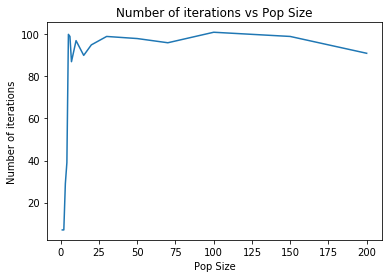

In [305]:
plt.plot(pop_sizes, iterations_by_popsize)
plt.title('Number of iterations vs Pop Size')
plt.xlabel('Pop Size')
plt.ylabel('Number of iterations')
plt.show()

Уменьшая popsize уменьшаем число итераций, но можем не найти глобальный минимум

#####  Tolerance for convergence

In [306]:
tols = [0.001, 0.01, 0.1, 0.2, 0.3, 0.31, 0.316, 0.32, 0.33, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

def dif_evo_iterations(tol):
    res = differential_evolution(ackley, bounds, tol=tol, seed=42)
    print(res.fun)
    return res.nit

iterations_by_tol = []

for tol in tols:
    iterations_by_tol.append(dif_evo_iterations(tol))

4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
2.5799275570299014
2.5799275570299014
2.5799275570299014
2.5799275570299014
2.5799275570299014
2.5799275570299014
2.5799275570299014
2.5799275570299014
2.5799275570299014


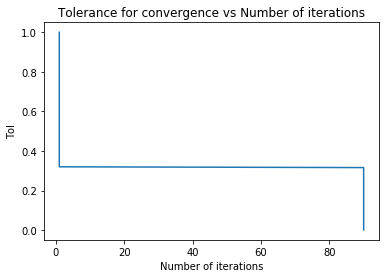

In [307]:
plt.plot(iterations_by_tol, tols)
plt.title('Tolerance for convergence vs Number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Tol')
plt.show()

В районе значения tol = 0.316 перестаем находить глобальный минимум

#####  Mutation

In [308]:
mutations = [(0.001, 0.01), (0.01, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.3), (0.4, 0.5),(0.5, 0.7), (0.7, 1), (1, 1.5), (1.5, 1.99)]
mutation_strings = [str(i) for i in mutations] 

def dif_evo_iterations(mutation):
    res = differential_evolution(ackley, bounds, mutation=mutation, seed=42)
    print(res.fun)
    return res.nit

iterations_by_mutation = []

for mutation in mutations:
    iterations_by_mutation.append(dif_evo_iterations(mutation))

3.5744518772577725
3.574451877257698
7.549516567451064e-15
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
7.549516567451064e-15


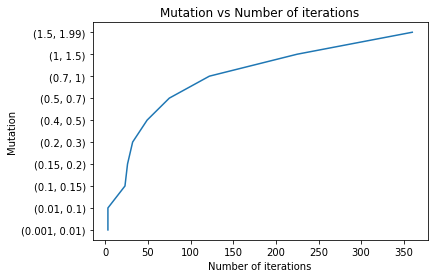

In [309]:
plt.plot(iterations_by_mutation, mutation_strings)
plt.title('Mutation vs Number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel('Mutation')
plt.show()

При низких значения mutation снова можем иметь проблемы с нахождением глобального минимума 

#####  Recombination

In [310]:
recombinations = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

def dif_evo_iterations(recombination):
    res = differential_evolution(ackley, bounds, recombination=recombination, seed=42)
    return res.nit

iterations_by_recombination = []

for recombination in recombinations:
    iterations_by_recombination.append(dif_evo_iterations(recombination))

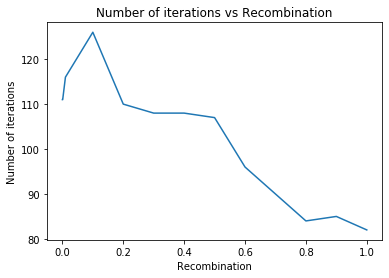

In [311]:
plt.plot(recombinations, iterations_by_recombination)
plt.title('Number of iterations vs Recombination')
plt.xlabel('Recombination')
plt.ylabel('Number of iterations')
plt.show()

#####  Updating

In [312]:
updating_values = ["immediate", "deferred"]

def dif_evo_iterations(updating):
    res = differential_evolution(ackley, bounds, updating=updating, seed=42)
    return res.nit

iterations_by_updating = []

for updating in updating_values:
    iterations_by_updating.append(dif_evo_iterations(updating))

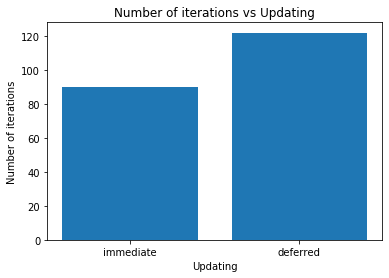

In [313]:
fig, ax = plt.subplots()
plt.bar(updating_values, iterations_by_updating)
plt.title('Number of iterations vs Updating')
plt.xlabel('Updating')
plt.ylabel('Number of iterations')
plt.show()

# Доп задание

In [365]:
strategy = 'best1bin'
popsize=15
tol=0.595
mutation=(0.1, 0.15)
recombination=0.8
updating='immediate'

best_result = differential_evolution(ackley, bounds, strategy=strategy,
                                    popsize=popsize, tol=tol, mutation=mutation,
                                    recombination=recombination, updating=updating, seed=42)
best_result

     fun: 1.9922115956916286e-08
     jac: array([0.00277538, 0.01283205])
 message: 'Optimization terminated successfully.'
    nfev: 210
     nit: 1
 success: True
       x: array([-4.99308410e-09, -4.96794214e-09])